# 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39は[matplotlib](http://matplotlib.org/)もしくは[Gnuplot](http://www.gnuplot.info/)を用いるとよい．

In [1]:
!mecab neko.txt > neko.txt.mecab

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ

In [7]:
def get_morph():
    file = 'neko.txt.mecab'
    morph = []
    sentence = []
    
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if line == 'EOS\n':
                if len(sentence) > 0:
                    morph.append(sentence)
                    sentence = []
            else:
                surface, others = line.split('\t')
                others = others.split(',')
                sentence.append({'surface':surface, 'base':others[6], 'pos':others[0], 'pos1': others[1]})
                
    return morph


## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [8]:
print([i['surface'] for sentence in get_morph() for i in sentence])

['一', '\u3000', '吾輩', 'は', '猫', 'で', 'ある', '。', '名前', 'は', 'まだ', '無い', '。', '\u3000', 'どこ', 'で', '生れ', 'た', 'か', 'とんと', '見当', 'が', 'つか', 'ぬ', '。', '何', 'でも', '薄暗い', 'じめじめ', 'し', 'た', '所', 'で', 'ニャーニャー', '泣い', 'て', 'いた事', 'だけ', 'は', '記憶', 'し', 'て', 'いる', '。', '吾輩', 'は', 'ここ', 'で', '始め', 'て', '人間', 'という', 'もの', 'を', '見', 'た', '。', 'しかも', 'あと', 'で', '聞く', 'と', 'それ', 'は', '書生', 'という', '人間', '中', 'で', '一番', '獰悪', 'な', '種族', 'で', 'あっ', 'た', 'そう', 'だ', '。', 'この', '書生', 'という', 'の', 'は', '時々', '我々', 'を', '捕え', 'て', '煮', 'て', '食う', 'という', '話', 'で', 'ある', '。', 'しかし', 'その', '当時', 'は', '何', 'という', '考', 'も', 'なかっ', 'た', 'から', '別段', '恐し', 'いとも', '思わ', 'なかっ', 'た', '。', 'ただ', '彼', 'の', '掌', 'に', '載せ', 'られ', 'て', 'スー', 'と', '持ち上げ', 'られ', 'た', '時', '何だか', 'フワフワ', 'し', 'た', '感じ', 'が', 'あっ', 'た', 'ばかり', 'で', 'ある', '。', '掌', 'の', '上', 'で', '少し', '落ちつい', 'て', '書生', 'の', '顔', 'を', '見', 'た', 'の', 'が', 'いわゆる', '人間', 'という', 'もの', 'の', '見', '始', 'で', 'あろ', 'う', '。', 'この', '時', '妙', 'な', 'もの', 'だ', 'と', '思っ', 'た',

## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [9]:
print([i['base'] for sentence in get_morph() for i in sentence])

['一', '\u3000', '吾輩', 'は', '猫', 'だ', 'ある', '。', '名前', 'は', 'まだ', '無い', '。', '\u3000', 'どこ', 'で', '生れる', 'た', 'か', 'とんと', '見当', 'が', 'つく', 'ぬ', '。', '何', 'でも', '薄暗い', 'じめじめ', 'する', 'た', '所', 'で', '*\n', '泣く', 'て', 'いた事', 'だけ', 'は', '記憶', 'する', 'て', 'いる', '。', '吾輩', 'は', 'ここ', 'で', '始める', 'て', '人間', 'という', 'もの', 'を', '見る', 'た', '。', 'しかも', 'あと', 'で', '聞く', 'と', 'それ', 'は', '書生', 'という', '人間', '中', 'で', '一番', '獰悪', 'だ', '種族', 'だ', 'ある', 'た', 'そう', 'だ', '。', 'この', '書生', 'という', 'の', 'は', '時々', '我々', 'を', '捕える', 'て', '煮る', 'て', '食う', 'という', '話', 'だ', 'ある', '。', 'しかし', 'その', '当時', 'は', '何', 'という', '考', 'も', 'ない', 'た', 'から', '別段', '恐い', 'いとも', '思う', 'ない', 'た', '。', 'ただ', '彼', 'の', '掌', 'に', '載せる', 'られる', 'て', 'スー', 'と', '持ち上げる', 'られる', 'た', '時', '何だか', 'フワフワ', 'する', 'た', '感じ', 'が', 'ある', 'た', 'ばかり', 'だ', 'ある', '。', '掌', 'の', '上', 'で', '少し', '落ちつく', 'て', '書生', 'の', '顔', 'を', '見る', 'た', 'の', 'が', 'いわゆる', '人間', 'という', 'もの', 'の', '見る', '始', 'だ', 'ある', 'う', '。', 'この', '時', '妙', 'だ', 'もの', 'だ', 'と', '

## 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [11]:
print([ i['surface'] for sentence in get_morph() for i in sentence if i['pos1'] == 'サ変接続' and '——' not in i['surface'] ])

['見当', '記憶', '話', '装飾', '突起', '運転', '記憶', '分別', '決心', '我慢', '餓死', '訪問', '始末', '猶予', '遭遇', '我慢', '記憶', '返報', '勉強', '勉強', '昼寝', '珍重', '昼寝', '経験', '供', '供', '供', '供', '同居', '観察', '断言', '同衾', '供', '迫害', '尊敬', '生活', '剿滅', '議論', '所有', '憤慨', '観念', '御馳走', '掠奪', '代言', '我儘', '我儘', '失敗', '話', '投書', '関', '決心', '昼寝', '鑑定', '話', '述懐', '想像', '写生', '感心', '昼寝', '失笑', '揶揄', '写生', '欠伸', '自白', '彩色', '写生', '判然', '心中', '感服', '小便', '猶予', '失敬', '欠伸', '予定', '失望', '漫罵', '小便', '増長', '増長', '我儘', '我慢', '報道', '供', '昼寝', '退屈', '加減', '一睡', '運動', '嘆賞', '佇立', '記憶', '珍重', '身動き', '挨拶', '鼓動', '軽蔑', '察', '肥満', '御馳走', '乱暴', '教育', '交際', '同盟', '敬遠', '軽侮', '問答', '御馳走', '邂逅', '邂逅', '相当', '雑談', '自慢', '質問', '発達', '比較', '覚悟', '自慢', '感心', '謹聴', '呼吸', '弁護', '思案', '吶喊', '掃除', '感心', '喝采', '質問', '反対', '呈出', '大息', '加減', '決心', '御馳走', '御馳走', '要心', '放蕩', '放蕩', '放蕩', '放蕩', '放蕩', '放蕩', '自任', '放蕩', '卒業', '関', '料理', '首肯', '批評', '関', '訪問', '忠告', '写生', '写生', '変化', '写生', '主張', '発達', '感心', '感服', '捏造', '話', '喜悦', '対話', '想像', '加減', '顧慮', '挑撥', '忠告',

## 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [12]:
phrase = []

for sentence in get_morph():
    for i in range(len(sentence)):
        if 0 < i < len(sentence) - 1 and sentence[i]['surface'] == 'の' and sentence[i-1]['pos'] == '名詞' and sentence[i+1]['pos'] == '名詞':
            phrase.append(sentence[i-1]['surface'] + sentence[i]['surface'] + sentence[i+1]['surface'])
            
print(phrase)

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親', '藁の上', '笹原の中', '池の前', '池の上', '一樹の蔭', '垣根の穴', '隣家の三', '時の通路', '一刻の猶予', '家の内', '彼の書生', '以外の人間', '前の書生', 'おさんの隙', 'おさんの三', '胸の痞', '家の主人', '主人の方', '鼻の下', '吾輩の顔', '自分の住', '吾輩の主人', '家のもの', 'うちのもの', '彼の書斎', '本の上', '皮膚の色', '本の上', '彼の毎夜', '以外のもの', '主人の傍', '彼の膝', '膝の上', '経験の上', '飯櫃の上', '炬燵の上', 'ここのうち', '供の寝床', '彼等の中間', '供の一', '例の神経', '性の主人', '次の部屋', '自分の勝手', '吾輩の方', '台所の板の間', '吾輩の尊敬', '向の白', '玉のよう', 'そこの家', '家の書生', '裏の池', '親子の愛', 'もっともの議論', '刺の頭', '鰡の臍', '彼等のため', '軍人の家', '代言の主人', '教師の家', '猫の時節', '吾輩の家', '家の主人', 'だらけの英文', '胃弱の癖', '後架の中', '平の宗', '月の月給', '当分の間', '下のよう', '今更のよう', '主人の述懐', '彼の友', '金縁の眼鏡', '主人の顔', '内の想像', '訳のもの', '利の大家', '金縁の裏', '吾輩の後ろ', '彼の友', '吾輩の輪廓', '顔のあたり', '上乗の出来', '顔の造作', '他の猫', '不器量の吾輩', '吾輩の主人', '斯産の猫', '斑入りの皮膚', '主人の彩色', '一種の色', '身内の筋肉', '主人の予定', '座敷の中', '悪口の言いよう', '人の気', '彼の背中', 'こっちの便利', '自己の力量', '人間の不徳', '吾輩の家', '家の裏', '浩然の気', '小春の穏', '日の二', '茶の木の根', '西側の杉', '垣のそば', '他の庭', '純粋の黒', '彼の皮膚', '皮膚の上',

## 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [13]:
phrases = []

for sentence in morph:
    conti = []
    for i in sentence:
        if i['pos'] == '名詞':
            conti.append(i['surface'])
        elif len(conti) >= 2:
            phrases.append(conti)
            conti = []
    

# sorted list for decreasing order with num.
#for i in sorted(phrases, key=lambda x:len(x), reverse=True):
#    print(i, len(i))


for phrase in phrases:
    n = len(phrase)
    print(phrase, n)

['吾輩', '猫'] 2
['どこ', '見当'] 2
['何', '所'] 2
['ニャーニャー', 'いた事'] 2
['吾輩', 'ここ'] 2
['人間', 'もの'] 2
['あと', 'それ'] 2
['書生', '人間', '中'] 3
['一番', '獰悪'] 2
['種族', 'そう'] 2
['書生', 'の'] 2
['我々', '話'] 2
['当時', '何'] 2
['彼', '掌'] 2
['スー', '時'] 2
['掌', '上'] 2
['書生', '顔'] 2
['の', '人間'] 2
['もの', '始'] 2
['時', '妙'] 2
['もの', '感じ'] 2
['一', '毛'] 2
['装飾', 'はず'] 2
['顔', '薬缶'] 2
['その後', '猫'] 2
['輪', '一', '度'] 3
['顔', '真中'] 2
['穴', '中'] 2
['ぷうぷうと', '煙'] 2
['これ', '人間'] 2
['煙草', 'もの'] 2
['事', '頃'] 2
['書生', '掌'] 2
['裏', '心持'] 2
['非常', '速力'] 2
['書生', 'の'] 2
['自分', 'の'] 2
['音', '眼'] 2
['それ', '記憶'] 2
['あと', '何'] 2
['気', '書生'] 2
['たくさん', '兄弟'] 2
['肝心', '母親'] 2
['上今', '所'] 2
['何', '容子'] 2
['吾輩', '藁'] 2
['上', '急'] 2
['笹原', '中'] 2
['思い', '笹原'] 2
['向う', '池'] 2
['吾輩', '池'] 2
['これ', '分別'] 2
['書生', '迎'] 2
['ニャー', 'ニャー'] 2
['試み', '誰'] 2
['池', '上'] 2
['風', '日'] 2
['腹', '非常'] 2
['仕方', '何'] 2
['食物', '所'] 2
['決心', '池'] 2
['そこ', '我慢'] 2
['無理やり', '事'] 2
['人間', '所'] 2
['ここ', '竹垣'] 2
['穴', '邸', '内'] 3
['縁', '不思議'] 2
['もの', '竹垣'] 2
['吾輩', '

## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [14]:
dict = {}

for sentence in morph:
    for word in sentence:
        dict[word['base']] = dict.get(word['base'], 0) + 1
     

print(dict)


#memo

#for sentence in morph:
#    for word in sentence:
#        if dict.get(word['surface']):
#            dict[word['surface']] += 1
#        else:
#            dict[word['surface']] = 1

{'着る': 37, '器用': 6, '木戸': 4, '倦む': 1, '人影': 1, '並べる': 15, 'ゴールド': 1, '態度': 12, '這入る': 121, '已める': 1, 'いそ': 2, '傑作': 5, '字': 35, '新しい': 6, '損害': 1, '門外漢': 1, '越える': 4, '旧弊': 2, '一周': 1, 'あびせる': 1, '結合': 1, '常磐': 1, '松風': 1, '逃げ惑う': 1, '諒察': 2, '滝': 2, '腕力': 3, '弾丸': 7, '細かい': 1, '薄い': 11, '眼前': 5, '狩野': 1, '理由': 16, '食い切る': 3, '浅黒い': 1, '薬礼': 1, 'よごれる': 2, '引きずる': 6, '雲井': 2, 'ダース': 3, '覧': 1, '多祥': 1, '歓喜': 1, '思索': 1, '拮抗': 1, 'たって': 39, '火の車': 1, '蓮': 1, '宮廷': 1, '両替': 2, '醒める': 3, '書翰': 1, 'きく': 22, '納まる': 1, '辞職': 6, 'はた': 4, '脳裏': 5, '寝言': 2, '古風': 3, 'おけら': 1, '頭領': 1, '本社': 1, '記述': 9, 'どういう': 2, '免職': 7, '将': 2, '過ごす': 1, '寝かす': 5, '吹聴': 13, 'からかう': 34, '無愛想': 1, '約束': 11, 'かさかさ': 2, '飛ばす': 2, '蚕': 1, '早計': 1, 'こぼれる': 4, '不備': 1, '通知': 1, '錐': 1, '綱目': 1, 'しばし': 5, '舞い戻る': 1, '麗': 1, '目方': 1, '健': 1, '不満': 3, '散らす': 6, 'さして': 1, '思いつく': 2, 'かこつ': 1, '斬る': 4, '図る': 3, '麓': 2, '北風': 1, '上野公園': 2, 'ニッケル': 1, '猿轡': 1, '本': 101, '償う': 2, '孔子': 5, 'ちと': 35, 'かい': 113, '瘤': 1, '膏薬': 2

## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

Populating the interactive namespace from numpy and matplotlib


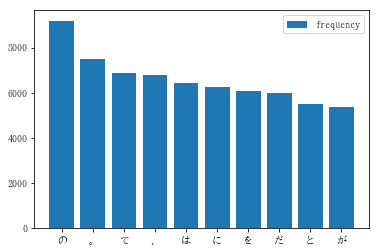

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline --no-import-all

dict = {}

for sentence in morph:
    for word in sentence:
        dict[word['base']] = dict.get(word['base'], 0) + 1
        
sorted_dict = sorted(dict.items(), key=lambda x: x[1], reverse=True)
top_ten = sorted_dict[:10]

values = [items[0] for items in top_ten]
keys = [items[1] for items in top_ten]

ind = np.arange(10)
width = 1

left = np.array(values)
plt.bar(ind, keys, label='frequency', align="center", tick_label=values)
plt.legend()
plt.show()

# check it again

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

In [19]:
dict = {}
count = {}

for sentence in morph:
    for word in sentence:
        dict[word['base']] = dict.get(word['base'], 0) + 1


num = {n:num.get(n, 0) + 1 for n in dict.values()}

left = np.array(len(num))    
label = sorted(list(num.keys()))
count =  [n[1] for n in sorted(num.items(), key=lambda x: x[0])]

print(count)
plt.hist(label, bins=100, range=(0,10000))
plt.title('histgram of term frequenct')
plt.xlabel('Term frequenct')
plt.ylabel('Frequency')
plt.show()

# check it again

NameError: name 'num' is not defined

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

In [20]:
## 39

dict = {}
num = {}

for sentence in morph:
    for word in sentence:
        dict[word['base']] = dict.get(word['base'], 0) + 1
        
#print(dict.values())
for n in dict.values():
    num[n] = num.get(num[n], 0) + 1

    
    
#num = {n:num.get(num[n], 0) + 1 for n in dict.values()}

# not finished yet

KeyError: 37